# Prelab 06

After having read the Introduction of the Lab manual we will investigate the performance of a PID controller on the given system. For that, we use frequency domain methods to easily simulate the closed-loop control. For the purposes of simplifying the modeling we discard the relationship between motor angles and plate pose - we skip the motors and links and assume that the output of the controller is directly the plate angle. </br>

This Jupyter notebook contains the skeleton of the code.  </br>
Put your code as well as the answers in the respective sections and hand in a single Jupyter notebook (.ipynb) file.

In [14]:
import numpy as np
import control
from control import TransferFunction, step_response, impulse_response, tf, pade, forced_response, series, feedback
from matplotlib import pyplot as plt

###  Prelab Q1
To analyze the system, it is sufficient to only consider one of the two directions of movement. We will look at the behaviour of the PID controller with movement in x-direction. 
Calculate the open loop transfer function of this plant. You can use the linearized differential equation to calculate the transfer function.
The transfer function is given by the Laplace transform of small changes in output over small changes in the input. The constant $g$ is approximated by $10m/s^2$ (for the formula 6.6 in the lab manual). Plot the impulse and the step response of the open loop transfer function using the functions `impulse_response()` and `step_response()` from the `python-control` package. </br>

**Use a step of 0.1 magnitude**, this means your input signal wants to control the ball 10 cm off-center. </br>

On your report, show the plots as subplots next to each other and comment and explain the difference between step and impulse response and what they mean for the open-loop system. </br>

**Don't forget to add axis labels to your plots to make them readable and get full marks.**

When defining transfer functions using the `python-control` package, you can define them by specifying the polynomial coefficients of the numerator and denominator or using algebraic expressions after initializing `s=TransferFunction.s`

When manipulating transfer functions (in series, in parallel, or in feedback), there exist different ways to express the resulting transfer function of such interconnections. </br>
Look at functions that are already imported for you and their documentation to understand how they work.


Documentation: <href/> https://python-control.readthedocs.io/en/0.9.3.post2/control.html<href>

In [19]:

# Print the open loop transfer function
print("The open loop transfer function of the plant is: ")

# Define frequency range ( 50001 equally spaced numbers between 0 and 5, inclusive )
T = np.linspace(0, 5, 50001)

# Define transfer function of plant
num = [3*10]           #The order is s², s¹, s, 1
den = [5, 0, 0]        #The order is s², s¹, s, 1
P = control.tf(num, den)
print('P(s) = ', P)



The open loop transfer function of the plant is: 
P(s) =  
 30
-----
5 s^2



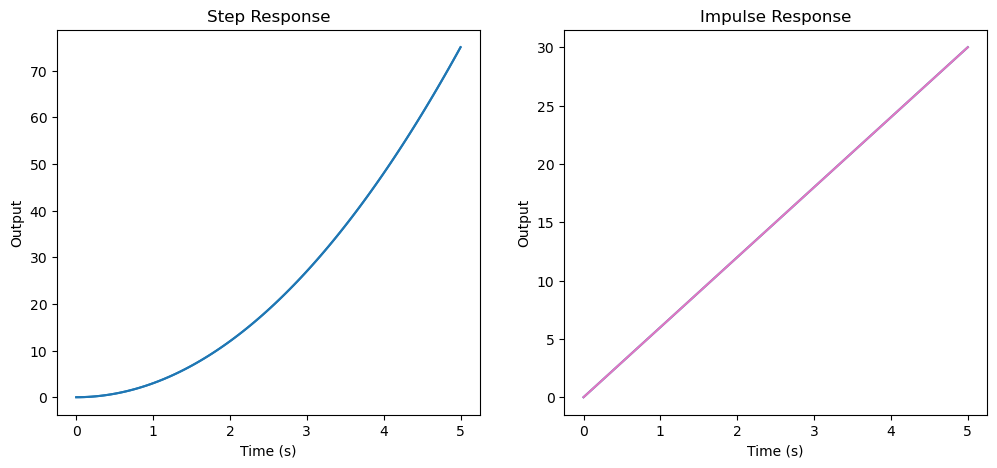

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(12,5)) #Aufstellen der plots

#Step-Antwort
t_step, y_step = control.step_response(P, T=5, X0=0.0) #Hatch the data

axs[0].plot(t_step, y_step)
axs[0].set_title('Step Response')
axs[0].set(xlabel = 'Time (s)', ylabel = 'Output')
axs[0].plot(t_step, y_step,'tab:blue')


#Impuls-Antwort
t_imp, y_imp = control.impulse_response(P, T=5, X0=0.0, input=0.1) #Wie oben empfohlen

axs[1].plot(t_imp, y_imp)
axs[1].set_title('Impulse Response')
axs[1].set(xlabel = 'Time (s)', ylabel = 'Output')
axs[1].plot(t_imp, y_imp,'tab:pink')


Comment and explain the difference between step and impulse response and what they mean for the open-loop system </br>


<font color=green>     Step response is the output of a system when the input is a sudden change in value, while impulse response is the output of a system when the input is a short duration signal modeled as a delta function.
    Step response shows how the system responds to a change in input over time, while impulse response shows how the system responds to a short duration input signal.
    In the open-loop system, step response helps to determine steady-state response and how quickly it's reached, while impulse response helps to determine frequency response and how it responds to high-frequency inputs.
    Both step and impulse responses are important in the design and analysis of control systems, and they are often used together to fully understand the behavior of the system.  </font>



### Prelab Q2

Create the transfer function of the controller and close the feedback loop according to Fig. 6.2. in the lab manual. Note that the inverse kinematics and servos are now skipped. You can further assume that the camera feedback has a transfer function of 1. For control in x-direction, this results in the simplified system depicted in the figure below. Plot the Step (0.1 magnitude) response for $K_p=20, K_i=1, K_d=2$. 

Is this response under-damped, critically damped or over-damped? 

<font color=green> underdamped, as overshoot </font>

What happens to your response if you increase $K_d$ to 20? 

<font color=green> response becomes damped - maybe even overdamped; no overshoot </font>

If you consider our real system with visual feedback, what could be the risk of increasing $K_d$ too high? </br>
<font color=green> The system would be too slow and would not reach the reference value in time to stabilise the system</font>

The script that you hand in should show the plot for the two $K_d$ values and the answers to the questions above. For this Prelab, write all your answers in Markdown cells within this file.

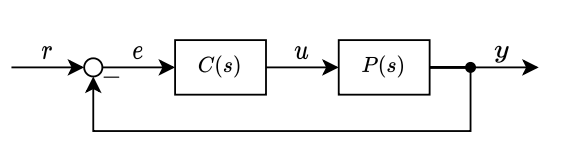

In [59]:
# Create the transfer function of the controller with closed feedback loop and the given parameters
Kp  = 20
Ki  = 1
Kd  = 2
Kd_ = 20


#controller transfer function with Kd=2

num_c = [Kd,Kp,Ki]
den_c = [1,0]

controller = control.tf(num_c,den_c) 
print('controller = ', controller)


#controller transfer function with Kd=20
num_c_ = [Kd_,Kp,Ki]
den_c_ = [1,0]

controller_ = control.tf(num_c_,den_c_)
print('controller_ = ',controller_)

#Forward loop ist ist P und controller multipliziert
forward = P * controller
forward_ = P * controller_

#This line of Python code uses the control library to compute the closed-loop transfer function of a control system.
T1  = control.feedback(forward)
T1_ = control.feedback(forward_)


T_step_1, step_closed_loop_1 = step_response(0.1*T1)
T_step_2, step_closed_loop_2 = step_response(0.1*T1_)

controller =  
2 s^2 + 20 s + 1
----------------
       s

controller_ =  
20 s^2 + 20 s + 1
-----------------
        s



Text(0.5, 1.0, 'Kd = 20')

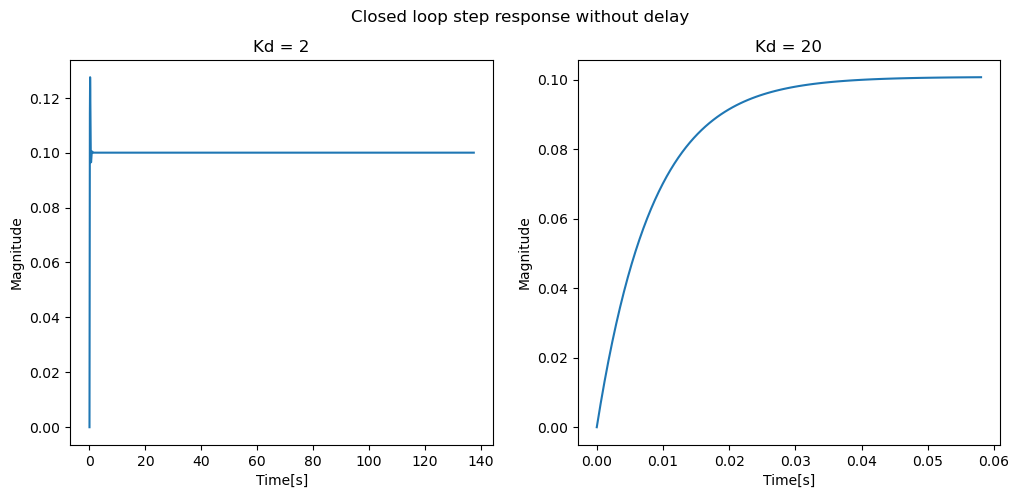

In [60]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

#Plot of the first feedback loop
ax1.plot(T_step_1, step_closed_loop_1)
ax1.set_xlabel("Time[s]")
ax1.set_ylabel("Magnitude")
ax1.set_title("Kd = 2")
fig.suptitle("Closed loop step response without delay")

#Plot of the second feedback loop
ax2.plot(T_step_2, step_closed_loop_2)
ax2.set_xlabel("Time[s]")
ax2.set_ylabel("Magnitude")
ax2.set_title("Kd = 20")


### Prelab Q3

The real system has a small latency due to the image-processing part happening on the Pixy cam. Although the setup with the Pixy cam minimizes this delay, it could still be big enough to impact our controller design.

Simulate this time-delay by adding it to our control loop. A time delay in the frequency domain is given by the exponential function $e^{−sT}$, where $s$ is the Laplace variable and $T$ is the delay. 

If we assume that the pixycam introduces a delay of 80ms, you will see that the system is no longer stable.

Find parameters that stabilize the system with a steady state error at 5 seconds that is smaller than 0.001 (=1mm) for a step input of 0.1 magnitude. Make sure to print the steady state error and plot the obtained response. 

If you increase the delay to 1 second it will be difficult to stabilize the system within 5 seconds, what is the fundamental reason for that?


<font color=green> Due to the system's extreme slowness caused by such a big delay, the controller is unable to make the necessary modifications because he does not receive information about the ball's position in a timely manner. </font>


The `python-control` library cannot express time delay as an exponential function. Therefore, we will use the `pade` function, which approximates the delay, expressed as a rational function.

The `pade` function takes as arguments, the desired delay and the degree of the denominator approximation, and returns the numerator and the denominator of the approximated delay.

https://python-control.readthedocs.io/en/latest/generated/control.pade.html?highlight=Pade
</br>

In [65]:
Kp, Ki, Kd = 1.3, 1, 1
delay, delay_ = 0.08, 1 
N_pade = 2

num = [Kd,Kp,Ki]
den = [1,0]
controller = control.tf(num,den) 

#As stated in the exercise
num_delay, denum_delay = control.pade(delay,N_pade)
num_delay2, denum_delay2 = control.pade(delay_, N_pade)

Hdelay  = control.TransferFunction(num_delay, denum_delay)
Hdelay_ = control.TransferFunction(num_delay2, denum_delay2)

In [66]:
T2  = control.feedback(P*controller*Hdelay)
T2_ = control.feedback(P*controller*Hdelay_)

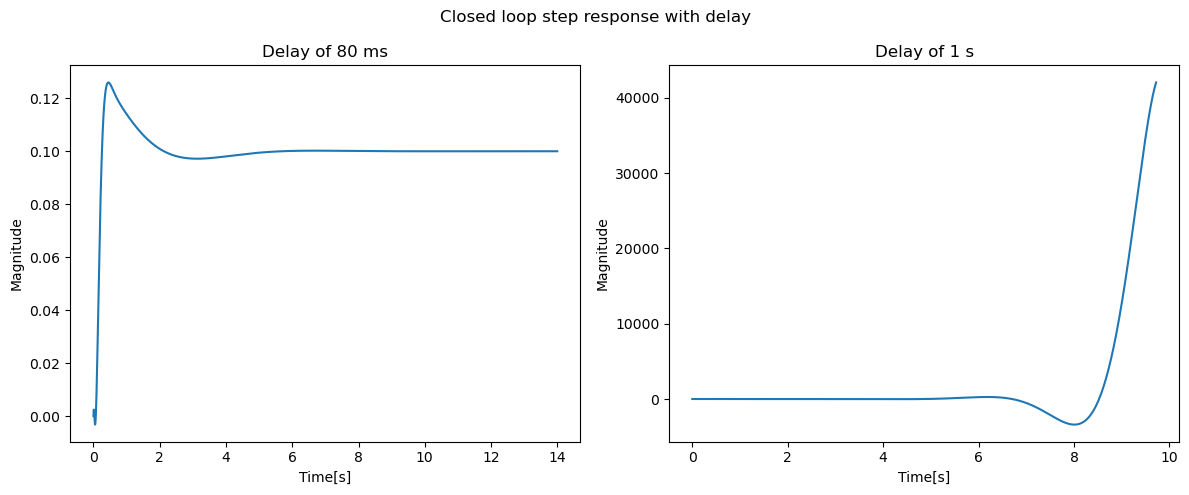

In [69]:
# Calculate and plot the closed loop step response with delay
fig, (axs1, axs2) = plt.subplots(1,2, figsize=(12,5))
fig.suptitle("Closed loop step response with delay")

#delay 80 ms
step_T2, step_resp_T2  = control.step_response(0.1*T2, T = 14) #simulation duration of 14 s

axs1.plot(step_T2, step_resp_T2)
axs1.set_xlabel("Time[s]")
axs1.set_ylabel("Magnitude")
axs1.set_title("Delay of 80 ms")


#delay 1 s
step_T2_, step_resp_T2_ = control.step_response(0.1*T2_)

axs2.plot(step_T2_, step_resp_T2_)
axs2.set_xlabel("Time[s]")
axs2.set_ylabel("Magnitude")
axs2.set_title("Delay of 1 s")



fig.tight_layout()

In [70]:
# Print your steady state error for both delays

import math


print("lenght of vector for 80 ms: ", len(step_resp_T2))
print("lenght of vector for 1 s: ", len(step_resp_T2_))

lenght1 = len(step_resp_T2)
lenght2 = len(step_resp_T2_)

#steady state error at 5 sec. is wanted. The step response result vector for a delay of 80 ms has 5000 values corresponding to a simulation time of
#14 seconds. Therefore, the index of the value in the vector corresponding to 5 sec. is 5*5000/14 = 1785

print("steady state error for 80 ms delay (at time t=5 sec) =", abs(round(step_resp_T2[math.trunc((lenght1*5)/14)] - 0.1, 6)))
print("steady state error for 1 s delay (at time t=5 sec) = ", abs(round(step_resp_T2_[math.trunc((lenght2*5)/14)] - 0.1, 3)))

lenght of vector for 80 ms:  5000
lenght of vector for 1 s:  942
steady state error for 80 ms delay (at time t=5 sec) = 0.000536
steady state error for 1 s delay (at time t=5 sec) =  5.223


### Prelab Q4

When analyzing the system further you notice that the PID controller’s output exceeds the speed limits of your motors. What could be one of the problems you face?


<font color=green> If the motors are driven at their top speed for too long, they could become damaged. Additionally, the physical system won't operate as you predicted because the motors can't obey the necessary command; it could not be as stable as you anticipated.</font>